In this kernel we do some exploratory data analysis of a kaggle dataset which explores customer churn for a telecoms company

In [111]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [112]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


First, it makes sense to explore the columns and make sure they are understood and write down any initial thoughts. This was done outside of this notebook.

__Customer ID:__
ID number for customer, not useful for analysis, unless it could be converted to some kind of ‘how long has this customer been with us metric,’ but we already have tenure. 

__Gender:__
Male or Female

__SeniorCitizen:__
0 or 1, is the customer a senior citizen. No info on age cutoff

__Partner:__
Yes or no, assume refers to spouse or de-facto

__Dependents:__
Yes or no, assume mainly refers to whether or not customer has children

__Tenure:__
Integer value, refers to months as customer

__PhoneService:__
Yes or no, does the customer have phone service

__MultipleLines:__
Yes, no or No phone service. May make sense to classify last two as same thing

__InternetService:__
DSL, Fiber Optic or No, refers to what type of internet service the person has

__OnlineSecurity:__
Yes, no or No internet service. May make sense to classify last two as same thing

__OnlineBackup:__
Yes, no or No internet service. May make sense to classify last two as same thing

__DeviceProtection:__
Yes, no or No internet service. May make sense to classify last two as same thing

__TechSupport:__
Yes, no or No internet service. May make sense to classify last two as same thing

__StreamingTV:__
Yes, no or No internet service. May make sense to classify last two as same thing

__StreamingMovies:__
Yes, no or No internet service. May make sense to classify last two as same thing

__Contract:__
Month-to-month, One year, Two year. Specifies contract term

__PaperlessBilling:__
Yes or no. Refers to whether the customer has paperless billing

__PaymentMethod:__
Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)

__MonthlyCharges:__
Various float values, how much the customer pays monthly

__TotalCharges:__
Various float values, how much the customer pays in total

__Churn:__
Yes or no, whether the customer churns


Initial thoughts - customer ID will not be useful for analysis, but we should check to make sure that there aren’t any duplicates. There is little cleaning to do in this dataset, except that some of the category names can be shortened (remove ‘...service’ and ‘...automatic’). 

It may make sense to classify things like 'no internet service' and 'no' as the same thing but there is a real difference and they could probably be left as they are.

Initially I was confused about the relationship between __PaperlessBilling__ and __PaymentMethod__, and how a person could not have paperless billing but still pay via bank transfer. This person would receive paper bills in the mail but still pay online, no relationship should be inferred between the two. 

In [113]:
# check for missing data:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This would of course be fairly atypical but helps us proceed quicker. The next step is to check the customer ID column for duplicates:

In [114]:
df['customerID'].duplicated().sum()

0

So we know that we aren't dealing with multiple instances of the same customer, and we don't need this column for analysis, so we can delete it

In [115]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A fairly minor cleaning job, which could actually have much larger effects in a big dataset, would be removing 'service' from columns where it occurs

In [116]:
df['MultipleLines'] = df.MultipleLines.str.replace(" service", "")
df['OnlineSecurity'] = df.OnlineSecurity.str.replace(" service", "")
df['OnlineBackup'] = df.OnlineBackup.str.replace(" service", "")
df['DeviceProtection'] = df.DeviceProtection.str.replace(" service", "")
df['TechSupport'] = df.TechSupport.str.replace(" service", "")
df['StreamingTV'] = df.StreamingTV.str.replace(" service", "")
df['StreamingMovies'] = df.StreamingMovies.str.replace(" service", "")

In [117]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


It probably pays to investigate the __PaymentMethod__ column a little to see whether we need the '(automatic)' designation

In [118]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

It seems like these distiguishing features could be useful so we will leave them as they are for now. For the sake of consistency, lets also make the SeniorCitizen column yes or no instead of 0 or 1

In [119]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [120]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df['SeniorCitizen'] = df['SeniorCitizen'].map({'0': 'No', '1': 'Yes'})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

For some reason __TotalCharges__ is stored as a string, this is easily fixed:

In [122]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dtypes

ValueError: could not convert string to float: 

Something in that column must not be in valid float form. Unfortunately, since there are 7000+ customers with fairly distinct values, we cant inspect them by looking at value counts

In [123]:
num_list = []
broken_list = []

for index,row in enumerate(df['TotalCharges']):
    try:
        num_list.append(float(row))
    except ValueError:
        print('Line {i} is corrupt'.format(i = index))
        broken_list.append(row)

Line 488 is corrupt
Line 753 is corrupt
Line 936 is corrupt
Line 1082 is corrupt
Line 1340 is corrupt
Line 3331 is corrupt
Line 3826 is corrupt
Line 4380 is corrupt
Line 5218 is corrupt
Line 6670 is corrupt
Line 6754 is corrupt


In [124]:
broken_list

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

In [125]:
df.shape

(7043, 20)

So we have a bunch of empty strings. One thing we could do here is copy across the values from MonthlyCharges, this seems logical but actually only occurs less than 10% of the time. The best thing to do is probably delete the rows, which only make up a tiny fraction of the dataset

In [126]:
df['TotalCharges'].replace(' ', np.nan, inplace=True)

In [127]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [128]:
df.dropna(subset=['TotalCharges'], inplace=True)
df.shape

(7032, 20)

In [129]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now for some exploratory analysis. Since most of the columns are categoricals, we can produce a series of bar plots fairly quickly

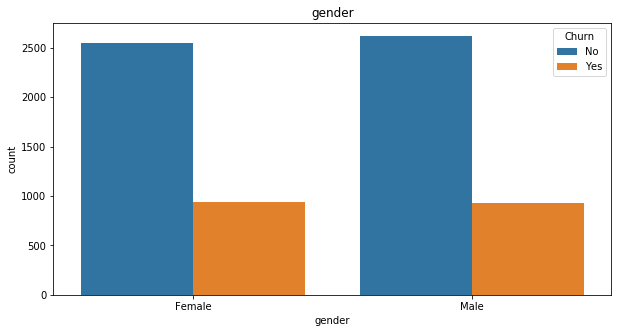

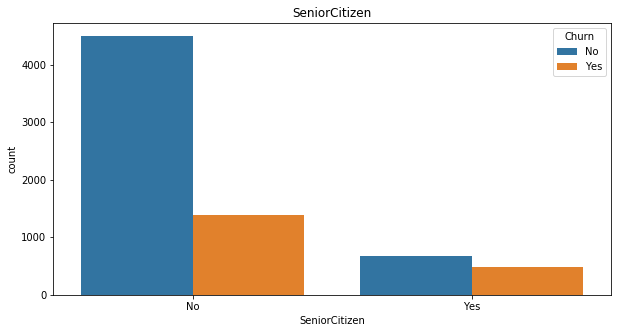

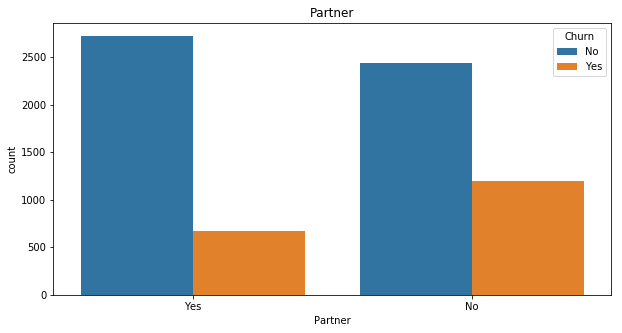

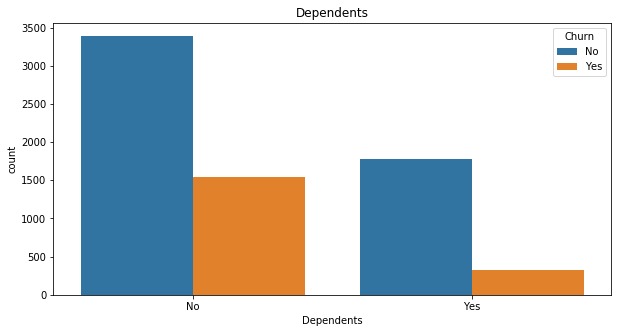

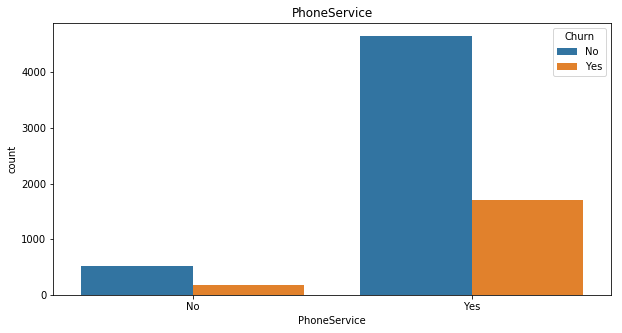

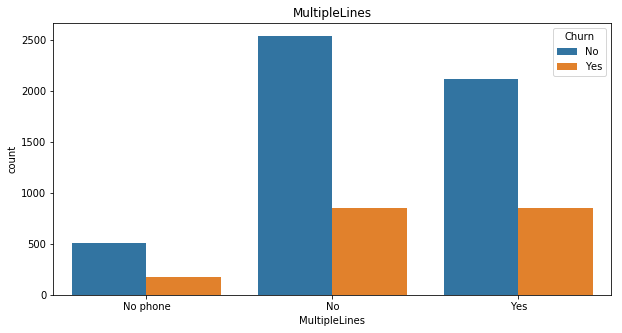

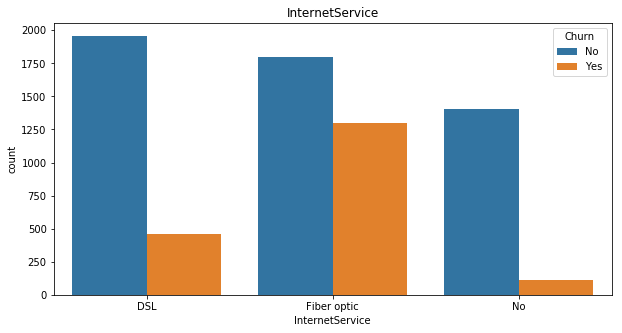

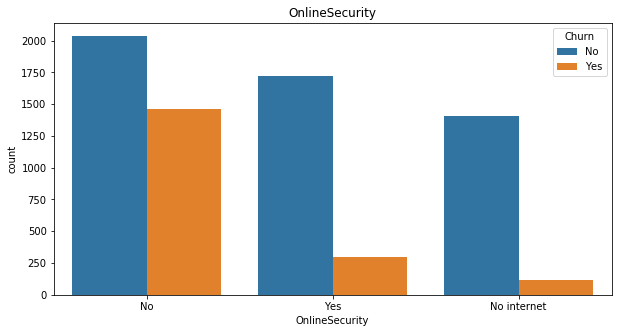

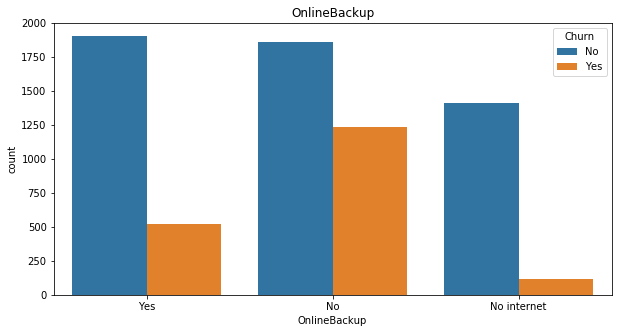

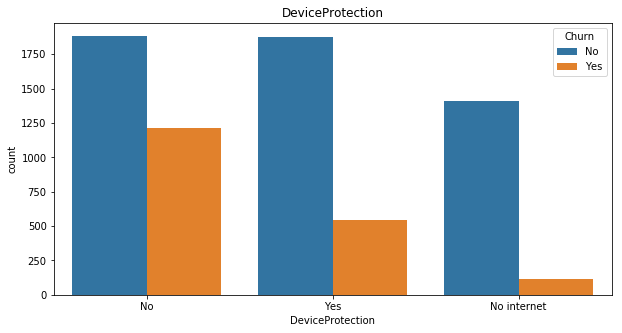

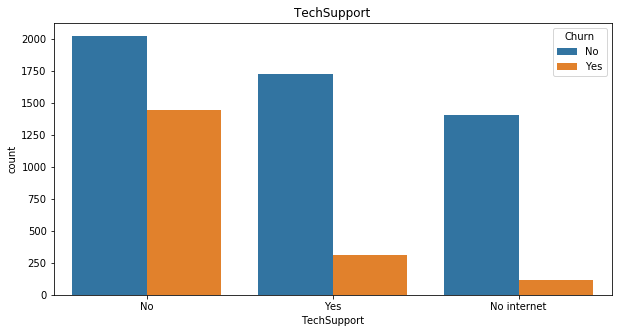

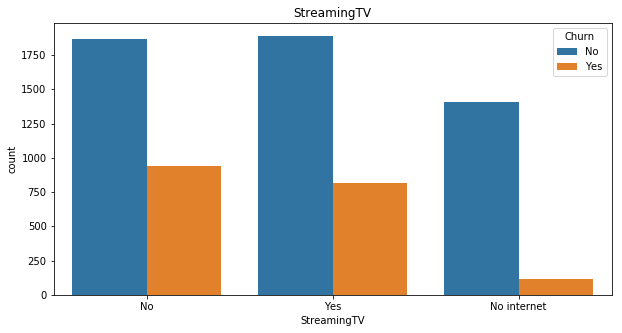

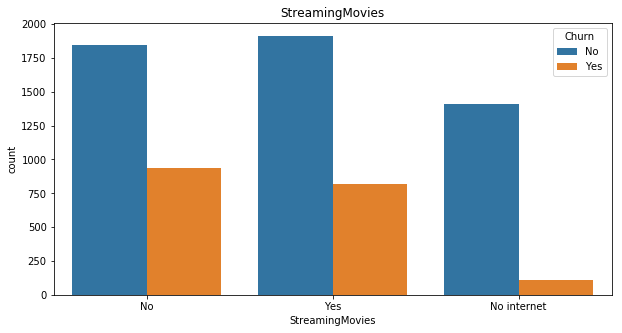

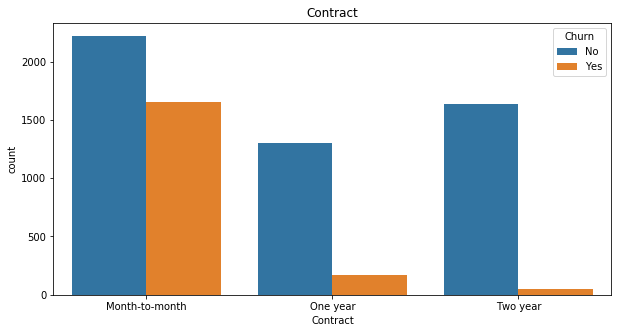

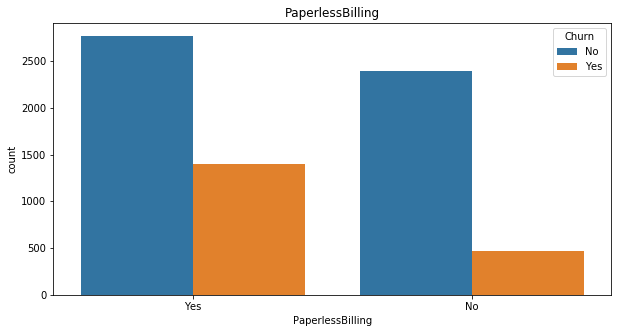

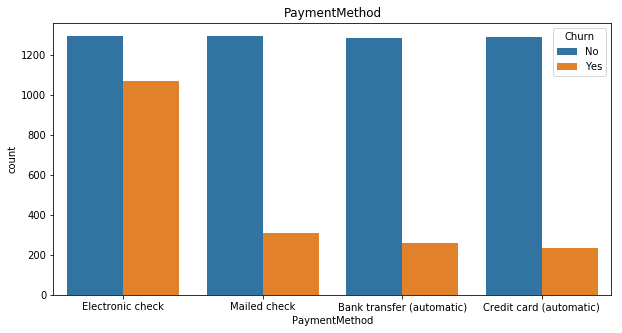

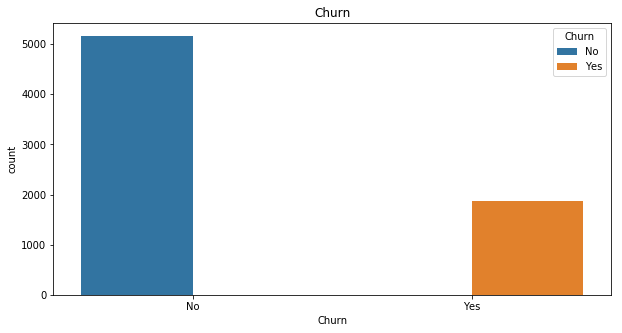

In [130]:
bars = df.drop(labels=['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
for col in bars:
    plt.figure(figsize=(10,5));
    plt.title(col);
    sns.countplot(df[col], hue=df["Churn"], );
    plt.show();

From a visual inspection, it would appear that __Dependents__, __InternetService__, __OnlineSecurity__, __Contract__, __OnlineBackup__, __DeviceProtection__, __TechSupport__, __Contract__, __PaymentMethod__ and __PaperlessBilling__ will all be reasonable predictors

Now to look at float and numerical variables:

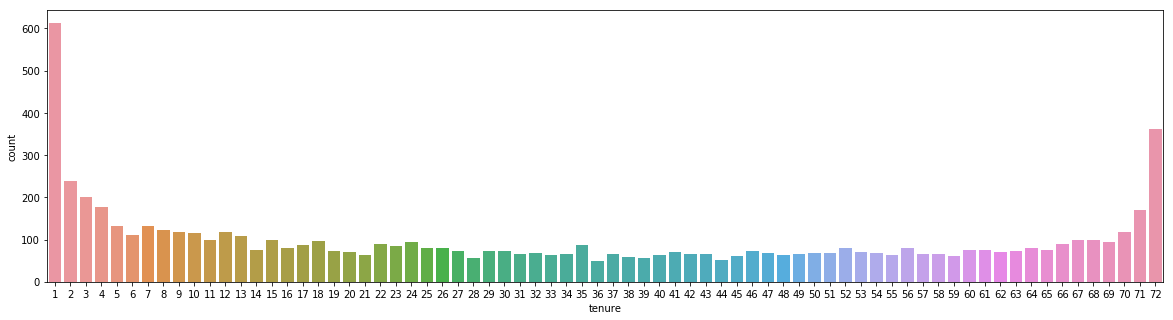

In [131]:
plt.figure(figsize=(20,5))
sns.countplot(df["tenure"])

This is mostly a fairly even distribution. The first thing to note is that the biggest groups of customers are those new to the company (1 - 4 months) and those who have been with the company for approximately 72 months. In this case I would guess that 72 months is either the point at which they stop counting or the maximum possible tenure (i.e. start of company). Its probably worth exploring this a bit more and seeing what churn looks like when we categorise customers into bins of approximately 6 months

In [132]:
def tenure_bins(month):
    if month >= 1 and month < 7:
        return '1-6'
    elif month >= 7 and month < 13:
        return '7-12'
    elif month >= 13 and month < 19:
        return '13-18'
    elif month >= 19 and month < 25:
        return '19-24'
    elif month >= 25 and month < 31:
        return '25-30'
    elif month >= 31 and month < 37:
        return '31-36'
    elif month >= 37 and month < 43:
        return '37-42'
    elif month >= 43 and month < 49:
        return '43-48'
    elif month >= 49 and month < 55:
        return '49-54'
    elif month >= 55 and month < 61:
        return '55-60'
    elif month >= 61 and month < 67:
        return '61-66'
    elif month >= 67 and month < 73:
        return '67-72+'
    else:
        return 'out of range'
    
tenures = df['tenure']
df['tenure_labels'] = df['tenure'].apply(tenure_bins)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_labels
0,Female,No,Yes,No,1,No,No phone,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-6
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,31-36
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-6
3,Male,No,No,No,45,No,No phone,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43-48
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-6


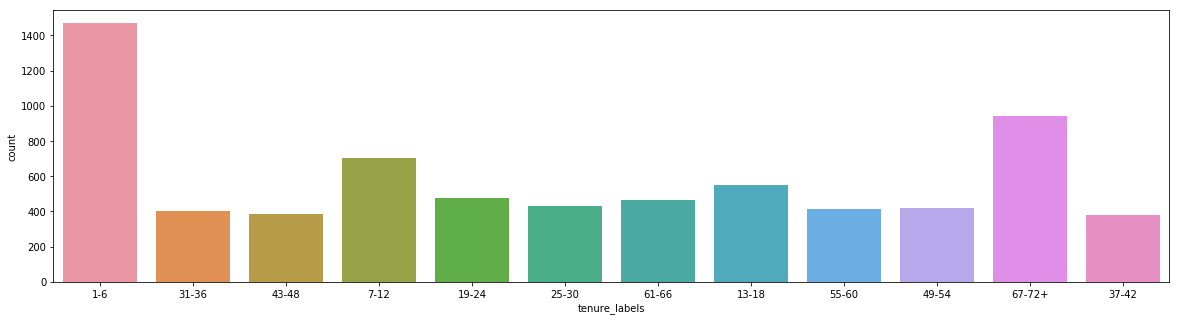

In [133]:
plt.figure(figsize=(20,5))
sns.countplot(df["tenure_labels"])

Lets have a look at how likely these groups are to churn

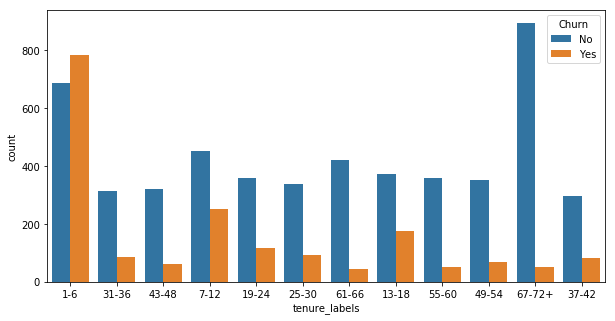

In [134]:
plt.figure(figsize=(10,5))
sns.countplot(df['tenure_labels'], hue=df["Churn"]);
plt.show()

This clearly illustrates to us that likelihood is highest at the beginning of the tenure. In fact, it is actually very low across the board after 18 months

Now to look at monthly charges:

/Users/peter/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


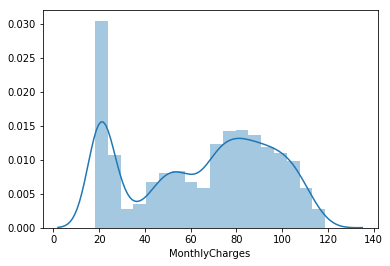

In [135]:
sns.distplot(df["MonthlyCharges"])

Most are at the lower end of the scale. Is total charges similar?

/Users/peter/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


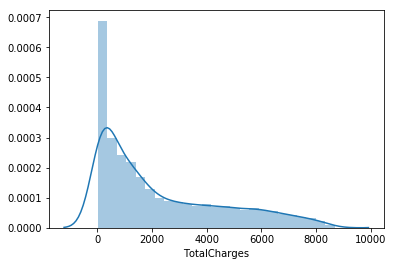

In [136]:
sns.distplot(df["TotalCharges"])

Very much so. We would probably want to do some kind of (log) transformation before using these, but for now lets see if we can spot any trends

In [137]:
def monthly_bins(bill):
    if bill >= 0 and bill < 26:
        return '0-25'
    elif bill >= 26 and bill < 51:
        return '26-50'
    elif bill >= 51 and bill < 76:
        return '51-75'
    elif bill >= 76 and bill < 101:
        return '76-100'
    elif bill >= 101 and bill < 126:
        return '101-125'
    else:
        return 'out of range'
    
bills = df['MonthlyCharges']
df['MonthlyCharge_labels'] = df['MonthlyCharges'].apply(monthly_bins)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_labels,MonthlyCharge_labels
0,Female,No,Yes,No,1,No,No phone,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-6,26-50
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,31-36,51-75
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-6,51-75
3,Male,No,No,No,45,No,No phone,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43-48,26-50
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-6,51-75


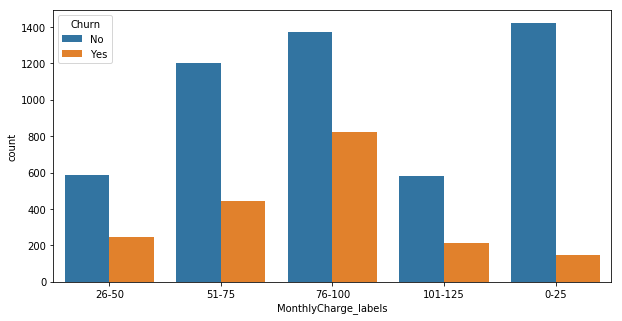

In [138]:
plt.figure(figsize=(10,5))
sns.countplot(df['MonthlyCharge_labels'], hue=df["Churn"]);
plt.show()

So it seems like customers at the very low range are most unlikely to churn, most likely are in the mid to upper range. Lets try the same thing for total charges:

In [139]:
def total_bins(bill):
    if bill >= 0 and bill < 501:
        return '0-500'
    elif bill >= 501 and bill < 1001:
        return '501-1000'
    elif bill >= 1001 and bill < 1501:
        return '1001-1500'
    elif bill >= 1501 and bill < 2001:
        return '1501-2000'
    elif bill >= 2001 and bill < 2501:
        return '2001-2500'
    elif bill >= 2501 and bill < 3001:
        return '2501-3000'
    elif bill >= 3001 and bill < 3501:
        return '3001-3500'
    elif bill >= 3501 and bill < 4001:
        return '3501-4000'
    elif bill >= 4001 and bill < 4501:
        return '4001-4500'
    elif bill >= 4501 and bill < 5001:
        return '4501-5000'
    elif bill >= 5001 and bill < 5501:
        return '5001-5500'
    elif bill >= 5501 and bill < 6001:
        return '5501-6000'
    elif bill >= 6001 and bill < 6501:
        return '6001-6500'
    elif bill >= 6501 and bill < 7001:
        return '6501-7000'
    elif bill >= 7001 and bill < 7501:
        return '7001-7500'
    elif bill >= 7501 and bill < 8001:
        return '7501-8000'
    elif bill >= 8001 and bill < 8501:
        return '8001-8500'
    elif bill >= 8501 and bill < 9001:
        return '8501-9000'
    elif bill >= 9001 and bill < 9501:
        return '9001-9500'
    elif bill >= 9501 and bill < 10000:
        return '9501-10000'
    else:
        return '10000+'
    
bills = df['TotalCharges']
df['TotalCharge_labels'] = df['TotalCharges'].apply(total_bins)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_labels,MonthlyCharge_labels,TotalCharge_labels
0,Female,No,Yes,No,1,No,No phone,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-6,26-50,0-500
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,31-36,51-75,1501-2000
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-6,51-75,0-500
3,Male,No,No,No,45,No,No phone,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,43-48,26-50,1501-2000
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-6,51-75,0-500


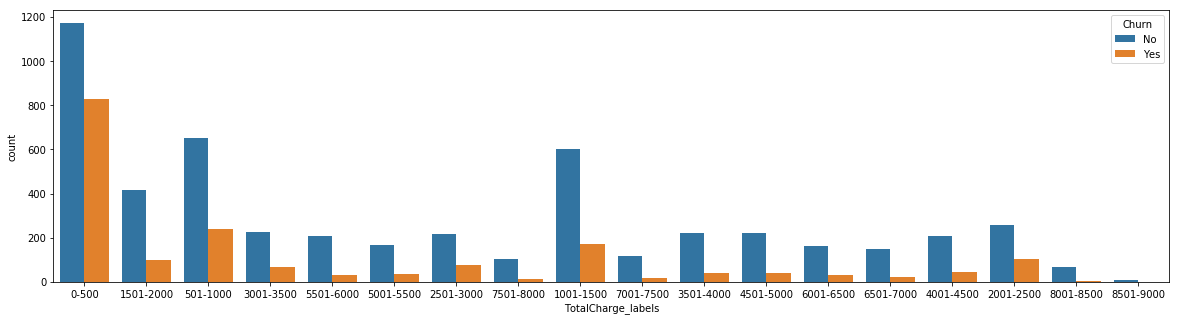

In [140]:
plt.figure(figsize=(20,5))
sns.countplot(df['TotalCharge_labels'], hue=df["Churn"]);
plt.show()

Churn looks similar across the board, except in the 0-500 bracket where it is relatively high

As far as data exploration goes, this is the end of the line. In terms of getting variables ready for ML, categorical variables would have to be encoded and numerical variables may need to be transformed, depending on the algorithm chosen. Same would go for scaling of the numerical variables, but it depends on the method. Once features are encoded, a feature adding the internet addons could be added, which may also give us further information on what type of people churn. But here are some takeaways from this short analysis:

* There is no single feature which is a really obvious predictor for churning
* Not having internet service makes a customer more unlikely to churn
* Being on a contract, as expected, makes a customer more unlikely to churn
* Paying by electronic check makes a customer more likely to churn
* Being at the beginning of a contract, especially within the first 6 months, makes a customer much more likely to churn
* Customers in the 0-25 payment bracket are very unlikely to churn, the most likely bracket is 75-100
* The most likely bracket for churn in terms of yearly payments is 0-500

Once this dataset is ready to be analysed, good candidates for a ML model would be __logistic regression__, __decision trees__ or a __random forest__